# Backpropagation

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Pre-processing

shape of x_mat_full is (500, 3)
shape of y is (500,)


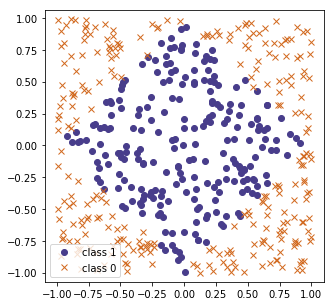

In [9]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
#Create Two Inputs
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
#Create a bias
x_mat_bias = np.ones((num_obs,1))
#Combine the inputs
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

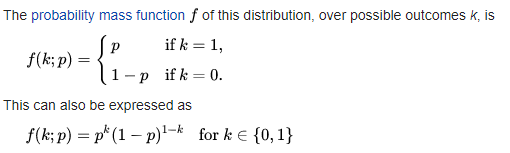

## Define Activation ,Loss, Forwardpass and Gradient Functions

In [11]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    
    #We are using Logarithmic Loss
    #If a prediction goes below eps (which is a very small number) then eps will be taken
    y_pred = np.maximum(y_pred,eps)
    #If a prediction goes above 1-eps (which is close to 1) then 1-eps will be taken
    y_pred = np.minimum(y_pred,(1-eps))
    #Correct classification will have a loss of zero. misclassification will have a loss of 1. We try to minimize this as much as possible
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

## Train the network with backpropagation

iteration 0, log loss is 0.7831,accuracy is 0.532
iteration 200, log loss is 0.6860,accuracy is 0.532
iteration 400, log loss is 0.6702,accuracy is 0.592
iteration 600, log loss is 0.6143,accuracy is 0.74
iteration 800, log loss is 0.5378,accuracy is 0.738
iteration 1000, log loss is 0.5084,accuracy is 0.744
iteration 1200, log loss is 0.4958,accuracy is 0.744
iteration 1400, log loss is 0.4613,accuracy is 0.776
iteration 1600, log loss is 0.3757,accuracy is 0.89
iteration 1800, log loss is 0.3224,accuracy is 0.902
iteration 2000, log loss is 0.2931,accuracy is 0.898
iteration 2200, log loss is 0.2689,accuracy is 0.912
iteration 2400, log loss is 0.2474,accuracy is 0.92
iteration 2600, log loss is 0.2316,accuracy is 0.922
iteration 2800, log loss is 0.2200,accuracy is 0.922
iteration 3000, log loss is 0.2105,accuracy is 0.93
iteration 3200, log loss is 0.2023,accuracy is 0.93
iteration 3400, log loss is 0.1951,accuracy is 0.942
iteration 3600, log loss is 0.1887,accuracy is 0.942
itera

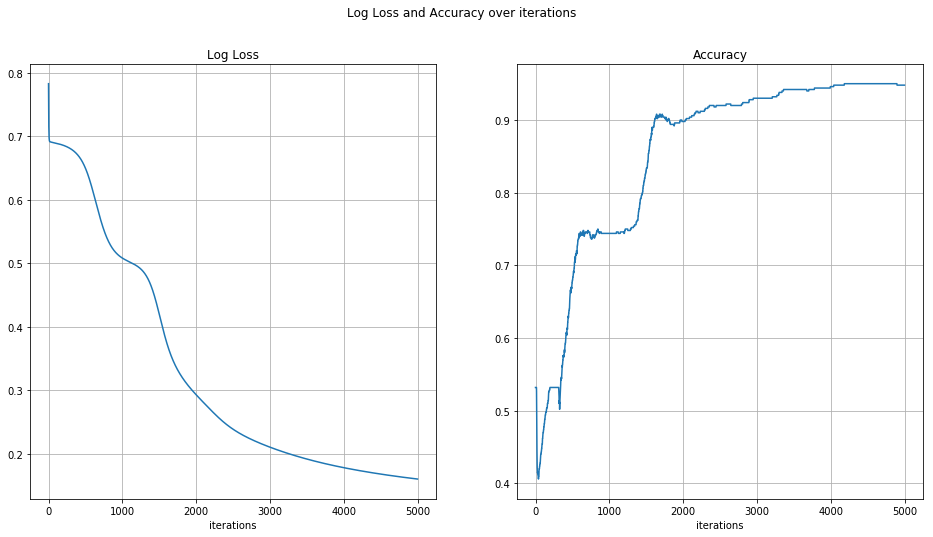

In [72]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred,(J_W_1_grad,J_W_2_grad)=forward_pass(W_1,W_2)
    
    ## Update the weight matrices
    W_1=W_1-learning_rate*J_W_1_grad
    W_2=W_2-learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss= loss_fn(y, y_pred)
    loss_vals.append(curr_loss)
    acc=np.sum((y_pred>=.5)==y)/num_obs
    accuracies.append(acc)
    ## Print the loss and accuracy for every 200th iteration
    if((i%200)==0):
        print('iteration {}, log loss is {:.4f},accuracy is {}'.format(i,curr_loss,acc))
    
plot_loss_accuracy(loss_vals, accuracies)

## Plot the predicted answers , with mistakes in yellow

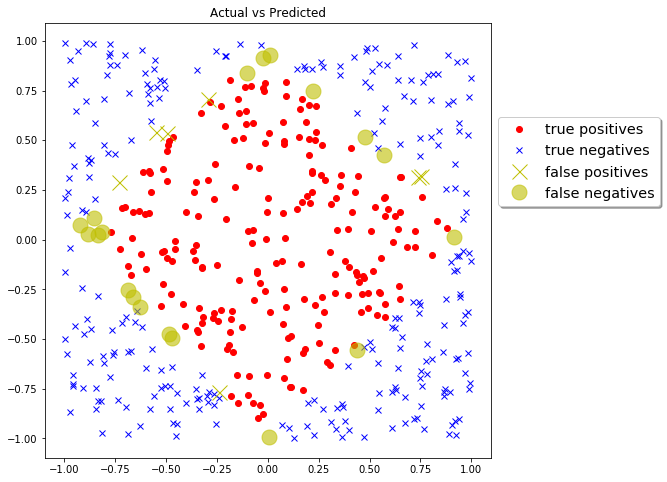

In [84]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8,8))
#True Predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1],'ro',label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1],'bx',label='true negatives')

#False predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1],'yx',label='false positives',markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1],'yo',label='false negatives',markersize=15,alpha=.6)
ax.set(title='Actual vs Predicted')
ax.legend(bbox_to_anchor=(1,0.8),fancybox=True, shadow=True, fontsize = 'x-large')